<a href="https://colab.research.google.com/github/pythonuzgit/elmurodov/blob/master/Machine%20Learning/USA_real_estate_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('/content/realtor-data.csv')
dataset.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,for_sale,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,for_sale,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731.0,1800.0,NaN
4,for_sale,65000.0,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [ ]:
dataset.describe()

,price,bed,bath,acre_lot,zip_code,house_size
count,4.021590e+05,314887.000000,316400.000000,326858.000000,401962.000000,3.189770e+05
mean,6.807346e+05,3.497566,2.568654,16.743579,3262.014889,2.226308e+03
std,1.184903e+06,2.328350,2.406962,888.634953,2211.541802,3.357398e+03
min,1.000000e+00,1.000000,1.000000,0.000000,601.000000,1.000000e+02
25%,1.999000e+05,2.000000,2.000000,0.200000,1880.000000,1.204000e+03
50%,3.990000e+05,3.000000,2.000000,0.570000,2809.000000,1.768000e+03
75%,7.200000e+05,4.000000,3.000000,2.240000,4530.000000,2.643000e+03
max,6.000000e+07,99.000000,198.000000,100000.000000,99999.000000,1.450112e+06


Data detail

In [ ]:
dataset.full_address.dtype

dtype('O')

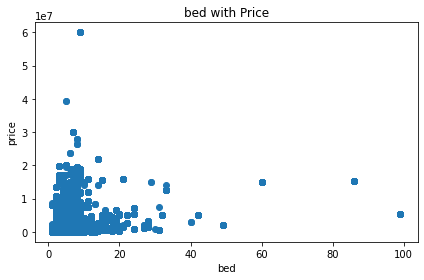

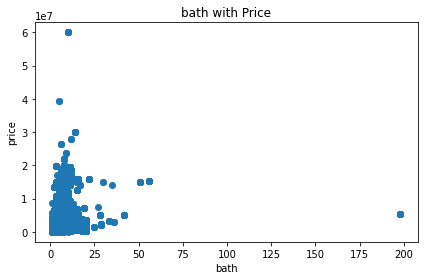

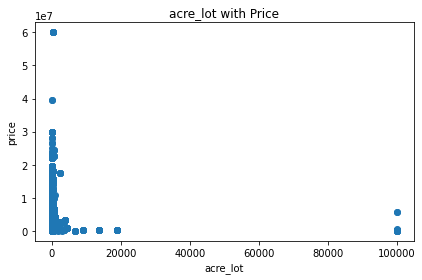

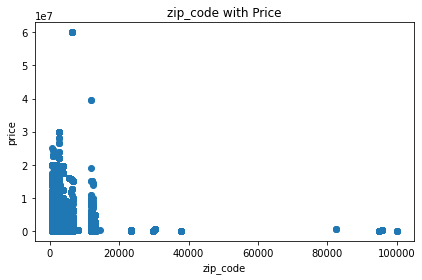

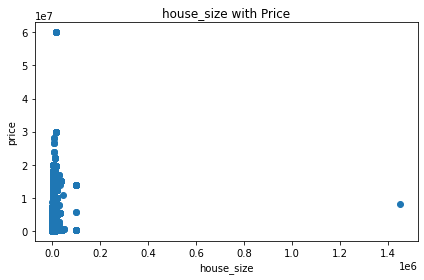

In [ ]:
for each in dataset.columns.values:
  if each != 'price' and dataset[each].dtype!='O':
    plt.plot(dataset[each],dataset['price'] ,'o',)
    plt.title(f"{each} with Price")
    plt.xlabel(f"{each}")
    plt.ylabel("price")
    plt.tight_layout()

    plt.show()


In [ ]:
X=dataset.copy()
X.drop(['price'],axis=1,inplace=True)
for each in X.columns:
  if X[each].dtype =='O':
    X.drop([each],axis=1,inplace=True)


Y=dataset.price

In [ ]:
X.head()

,bed,bath,acre_lot,zip_code,house_size
0,3.0,2.0,0.12,601.0,920.0
1,4.0,2.0,0.08,601.0,1527.0
2,2.0,1.0,0.15,795.0,748.0
3,4.0,2.0,0.10,731.0,1800.0
4,6.0,2.0,0.05,680.0,NaN


In [ ]:
for each in X.columns:
  print(X[each].isnull().value_counts())

False    314887
True      87272
Name: bed, dtype: int64
False    316400
True      85759
Name: bath, dtype: int64
False    326858
True      75301
Name: acre_lot, dtype: int64
False    401962
True        197
Name: zip_code, dtype: int64
False    318977
True      83182
Name: house_size, dtype: int64


In [ ]:
X.fillna(method= 'ffill', inplace=True)

In [ ]:
X.isna().sum()

bed           0
bath          0
acre_lot      0
zip_code      0
house_size    0
dtype: int64

In [ ]:
Y.isna().sum()

0

In [ ]:
import statsmodels.api as sm

X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                 1.341e+04
Date:                Fri, 08 Jul 2022   Prob (F-statistic):               0.00
Time:                        13:47:00   Log-Likelihood:            -6.1639e+06
No. Observations:              402159   AIC:                         1.233e+07
Df Residuals:                  402153   BIC:                         1.233e+07
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.173e+05   4072.469    102.462      0.000    4.09e+05    4.25e+05
bed         -3.64e+04   1066.108    -34.146      0.000   -3.85e+04   -3.43e+04
bath        1.588e+05   1049.394    151.292      0.000    1.57e+05    1.61e+05
acre_lot       2.1732      1.945      1.118      0.264      -1.638       5.985
zip_code     -53.4602      0.782    -68.338      0.000     -54.993     -51.927
house_size    61.8632      0.580    106.670      0.000      60.726      63.000
==============================================================================
Omnibus:                   562113.621   Durbin-Watson:                   1.567
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1598754657.869
Skew:                           7.348   Prob(JB):                         0.00
Kurtosis:                     311.536   Cond. No.                     1.15e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Dropping column

In [ ]:
X_value = X.drop('acre_lot', axis = 1)

Finally Data is ready for machine learning model

In [ ]:
import statsmodels.api as sm 
X = sm.add_constant(X_value)
model = sm.OLS(Y, X)
results = model.fit()
results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                 1.676e+04
Date:                Fri, 08 Jul 2022   Prob (F-statistic):               0.00
Time:                        13:54:36   Log-Likelihood:            -6.1639e+06
No. Observations:              402159   AIC:                         1.233e+07
Df Residuals:                  402154   BIC:                         1.233e+07
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.173e+05   4072.451    102.459      0.000    4.09e+05    4.25e+05
bed        -3.641e+04   1066.087    -34.154      0.000   -3.85e+04   -3.43e+04
bath        1.588e+05   1049.393    151.291      0.000    1.57e+05    1.61e+05
zip_code     -53.4447      0.782    -68.329      0.000     -54.978     -51.912
house_size    61.8754      0.580    106.710      0.000      60.739      63.012
==============================================================================
Omnibus:                   562100.843   Durbin-Watson:                   1.567
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1599491358.133
Skew:                           7.347   Prob(JB):                         0.00
Kurtosis:                     311.607   Cond. No.                     1.15e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Normalizing the data

Using MinMaxScaler Normalizer

In [ ]:
from sklearn import preprocessing
names = X_value.columns
scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(X_value)
scaled_df_minmax = pd.DataFrame(d, columns = names)
scaled_df_minmax.head()

,const,bed,bath,zip_code,house_size
0,0.0,0.020408,0.005076,0.000000,0.000566
1,0.0,0.030612,0.005076,0.000000,0.000984
2,0.0,0.010204,0.000000,0.001952,0.000447
3,0.0,0.030612,0.005076,0.001308,0.001172
4,0.0,0.051020,0.005076,0.000795,0.001172


In [ ]:
names = X_value.columns
scaler = preprocessing.normalize(X_value)
scaled_df_normal = pd.DataFrame(d, columns = names)

scaled_df_normal.head()

,const,bed,bath,zip_code,house_size
0,0.0,0.020408,0.005076,0.000000,0.000566
1,0.0,0.030612,0.005076,0.000000,0.000984
2,0.0,0.010204,0.000000,0.001952,0.000447
3,0.0,0.030612,0.005076,0.001308,0.001172
4,0.0,0.051020,0.005076,0.000795,0.001172


Difference between log and exponent

In [ ]:
log_and_exp = pd.DataFrame(Y)
log_and_exp

,price
0,105000.0
1,80000.0
2,67000.0
3,145000.0
4,65000.0
...,...
402154,299900.0
402155,275000.0
402156,99900.0
402157,259700.0


In [ ]:
log_and_exp['log_price'] = np.log(Y)
log_and_exp['exp_of_log_price'] = np.exp(log_and_exp.log_price)

In [ ]:
log_and_exp

,price,log_price,exp_of_log_price
0,105000.0,11.561716,105000.0
1,80000.0,11.289782,80000.0
2,67000.0,11.112448,67000.0
3,145000.0,11.884489,145000.0
4,65000.0,11.082143,65000.0
...,...,...,...
402154,299900.0,12.611204,299900.0
402155,275000.0,12.524526,275000.0
402156,99900.0,11.511925,99900.0
402157,259700.0,12.467282,259700.0


Useful Machine learning

In [ ]:
#from catboost import CatBoostRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_df_minmax, log_and_exp.log_price, 
                                                    test_size = 0.33, random_state = 42)

model = CatBoostRegressor(iterations = 50, learning_rate = 0.01)

model.fit(X_train,y_train)

preds_with_minmax = model.predict(X_test)



0:	learn: 1.1011942	total: 39.9ms	remaining: 1.95s
1:	learn: 1.0971362	total: 77.5ms	remaining: 1.86s
2:	learn: 1.0931760	total: 113ms	remaining: 1.77s
3:	learn: 1.0892535	total: 145ms	remaining: 1.67s
4:	learn: 1.0853397	total: 177ms	remaining: 1.59s
5:	learn: 1.0814922	total: 208ms	remaining: 1.52s
6:	learn: 1.0777184	total: 244ms	remaining: 1.5s
7:	learn: 1.0740022	total: 275ms	remaining: 1.45s
8:	learn: 1.0704026	total: 309ms	remaining: 1.41s
9:	learn: 1.0668157	total: 354ms	remaining: 1.41s
10:	learn: 1.0633533	total: 385ms	remaining: 1.36s
11:	learn: 1.0599785	total: 424ms	remaining: 1.34s
12:	learn: 1.0565972	total: 491ms	remaining: 1.4s
13:	learn: 1.0532528	total: 524ms	remaining: 1.35s
14:	learn: 1.0499645	total: 555ms	remaining: 1.29s
15:	learn: 1.0467120	total: 586ms	remaining: 1.25s
16:	learn: 1.0435287	total: 618ms	remaining: 1.2s
17:	learn: 1.0404067	total: 649ms	remaining: 1.15s
18:	learn: 1.0373469	total: 683ms	remaining: 1.11s
19:	learn: 1.0342659	total: 718ms	remainin

In [ ]:
from catboost import CatBoostRegressor
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_df_normal,np.array(log_and_exp.log_price), 
                                                    test_size=0.33, random_state=42)
model = CatBoostRegressor(iterations = 100, learning_rate = 0.01)

model.fit(X_train, y_train)
#get predictions
preds_with_normalization = model.predict(X_test)

0:	learn: 1.1011942	total: 100ms	remaining: 9.93s
1:	learn: 1.0971362	total: 200ms	remaining: 9.8s
2:	learn: 1.0931760	total: 254ms	remaining: 8.23s
3:	learn: 1.0892535	total: 335ms	remaining: 8.03s
4:	learn: 1.0853397	total: 408ms	remaining: 7.74s
5:	learn: 1.0814922	total: 485ms	remaining: 7.59s
6:	learn: 1.0777184	total: 566ms	remaining: 7.53s
7:	learn: 1.0740022	total: 668ms	remaining: 7.68s
8:	learn: 1.0704026	total: 744ms	remaining: 7.53s
9:	learn: 1.0668157	total: 832ms	remaining: 7.49s
10:	learn: 1.0633533	total: 898ms	remaining: 7.26s
11:	learn: 1.0599785	total: 961ms	remaining: 7.05s
12:	learn: 1.0565972	total: 1.02s	remaining: 6.82s
13:	learn: 1.0532528	total: 1.09s	remaining: 6.68s
14:	learn: 1.0499645	total: 1.16s	remaining: 6.57s
15:	learn: 1.0467120	total: 1.24s	remaining: 6.51s
16:	learn: 1.0435287	total: 1.32s	remaining: 6.44s
17:	learn: 1.0404067	total: 1.39s	remaining: 6.35s
18:	learn: 1.0373469	total: 1.48s	remaining: 6.31s
19:	learn: 1.0342659	total: 1.55s	remainin

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(scaled_df_normal), 
                                                    np.array(log_and_exp.log_price),
                                                    test_size = 0.33, random_state = 42)

pred = model.predict(X_test)

reg = LinearRegression().fit(X_train,y_train)

In [ ]:
reg.score(X_test, y_test) * 100

1.700222856315825

In [ ]:
print(f"Accuracy that we got after Normalizatiion {model.score( X_test,y_test)*100}")
print(f"Accuracy that we got after MinMax  {model.score( X_test,y_test)*100}")
print(f"Accuracy that we got from Normalization with Sklearn.linear Model  {reg.score(X_test ,y_test)*100}")

Accuracy that we got after Normalizatiion 33.73636183387082
Accuracy that we got after MinMax  33.73636183387082
Accuracy that we got from Normalization with Sklearn.linear Model  1.700222856315825
